# Introduction


This project is based on the dataset Heart Desease from UCI Machine Learning Repository and intends to predict if a person has or not heart desease. This would help in early detection of heart disease and hopefully serve as an aid in prevention of disease.

The dataset was collected  from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) 

This dataset contains information as related below and states the presence or not of heart disease.One of the most important column is 'target' which shows if an individuo has or not heart disease:

- **age** : age of the patient [years]
- **sex** : sex of the patient [1: Male, 0: Female]
- **cp** : chest pain type [1: Typical Angina, 2: Atypical Angina, 3: Non-Anginal Pain, 4: Asymptomatic]
- **trestbps** : resting blood pressure [mm Hg]
- **chol** : serum cholesterol [mm/dl]
- **fbs** : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **restecg** : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **thalach** : maximum heart rate achieved [Numeric value between 60 and 202]
- **exang** : exercise-induced angina [Y: Yes, N: No]
- **oldpeak** : oldpeak = ST [Numeric value measured in depression]
- **slope** : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **ca** : the number of major vessels (0-3)
- **thal** : a blood disorder called thalassemia [3: normal, 6: fixed defect, 7: reversable defect]
- **target** : heart disease [0: no, 1: yes]

# Importing Libs

In [81]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [144]:
# Import Machine Learning Libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing Dataset

In [83]:
# Dataset with 1025 rows and 14 colunms
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


  ## Exploring Dataset

In [84]:
df.info()
# except of colunm 'oldpeak' which the dtyoe is float, the others columns are int64
# 1025 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [85]:
# there is no null
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [86]:
# 723 entries are duplicated
# when an entry apperar more than once, it receives a disproportionate weigh during training.
#
df.duplicated().sum()

723

# Cleaning Dataset

In [87]:
# dropping duplicated values with funcion drop_duplicates
# in other to track it later, we will create a new dataframe called hd (heart disease)
hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## Checking outliers

In [88]:
# in order to check outliears
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1. Outliers are extreme values that differ from most other data points in a dataset.
<br>
2. They can have a big impact on your statistical analyses and skew the results of any hypothesis tests. Removing them may be a good practice to improve the efficacy of the ML model
<br>
3. In relation to 'chol' column, from 25% tyo 75% the data is limited to 274.75.
<br>
4. From 75% to max, we can see that the values more than double: 564.00. 
<br>
**That is our outlier and most be treated properly.**


## Checking correlation

In [89]:
# despite of this function works to check correlation, it is very hard to discern the infornation precisely.
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Another way to check correlation is using *seaborn* function: `sns.heatmap`

<AxesSubplot:>

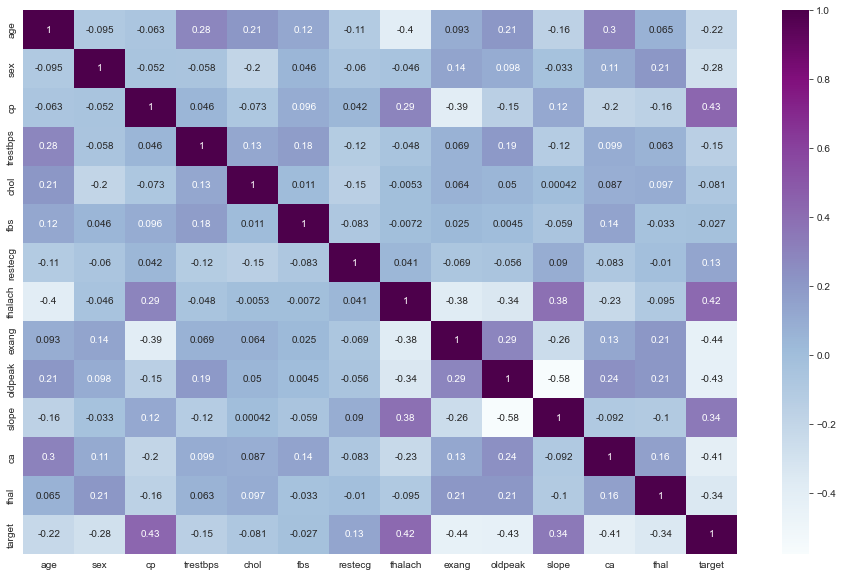

In [139]:
plt.figure(figsize = (16,10)) # to increase img size
sns.heatmap(hd.corr(), annot = True, cmap = 'BuPu')

With the above chart it is easier to spot which columns is more correlated to the target:
1. The following columns are not much correlated to the target column: `fbs`, `chol`, `trestbps`, `restecg` 

## Segregating information

In [91]:
hd.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


Checking which column is categorical or numerical 

In [92]:
hd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [93]:
for c in hd.columns:
    print(f'{c}: {hd[c].nunique()}')

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [94]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numeric = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

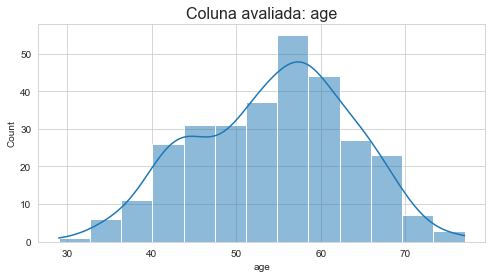

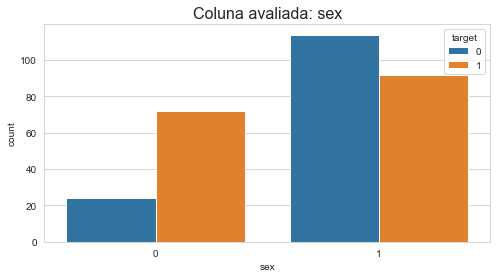

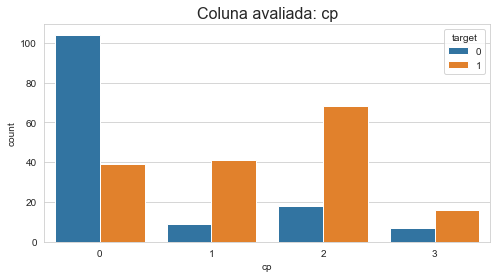

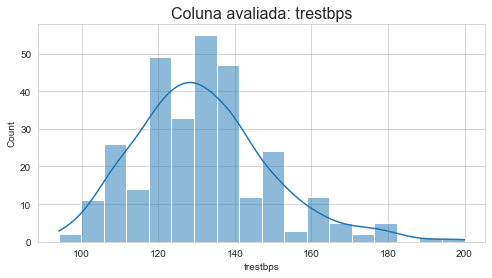

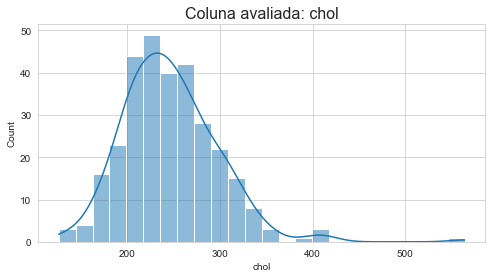

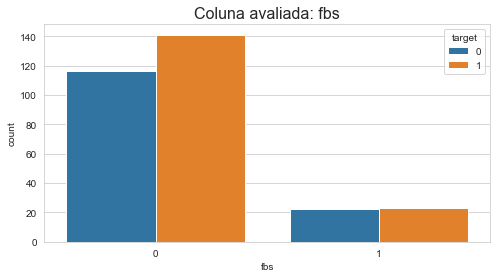

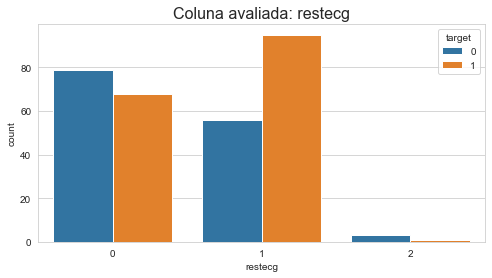

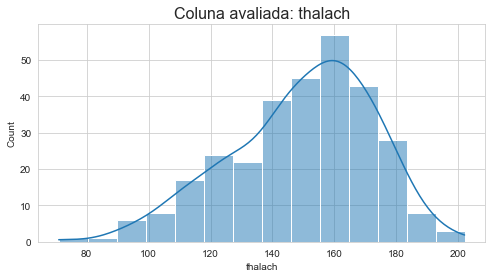

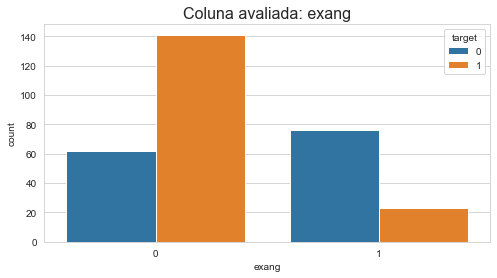

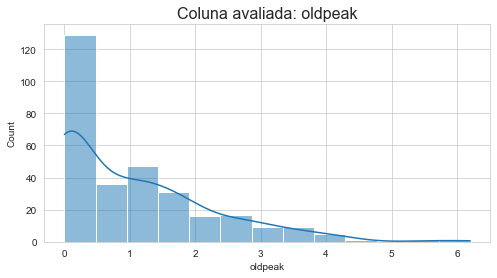

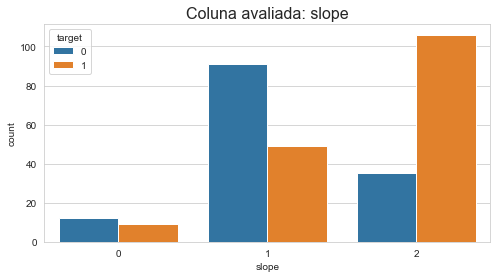

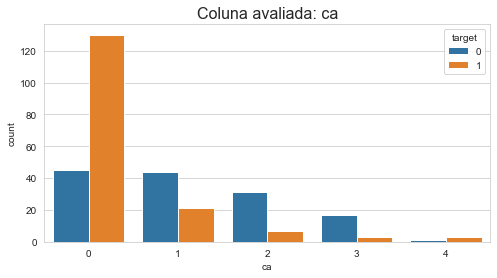

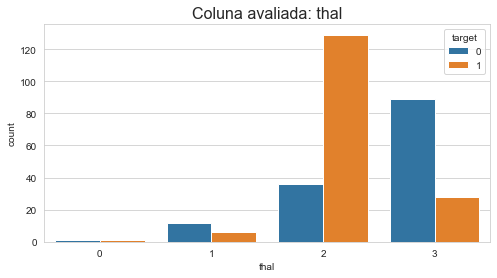

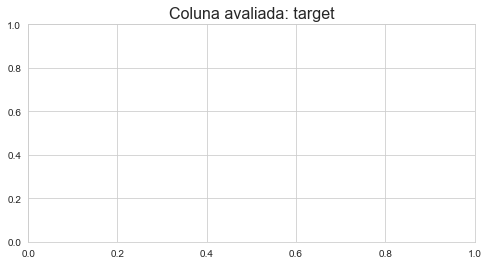

In [95]:
for c in hd.columns:
    plt.figure(figsize = (8,4))
    plt.title(f'Coluna avaliada: {c}', fontsize = 16)
    if c in categorical:
        sns.countplot(x = hd[c], hue = hd['target'])
    if c in numeric:
        sns.histplot(hd[c], kde = True)

## Removing outliers

<AxesSubplot:>

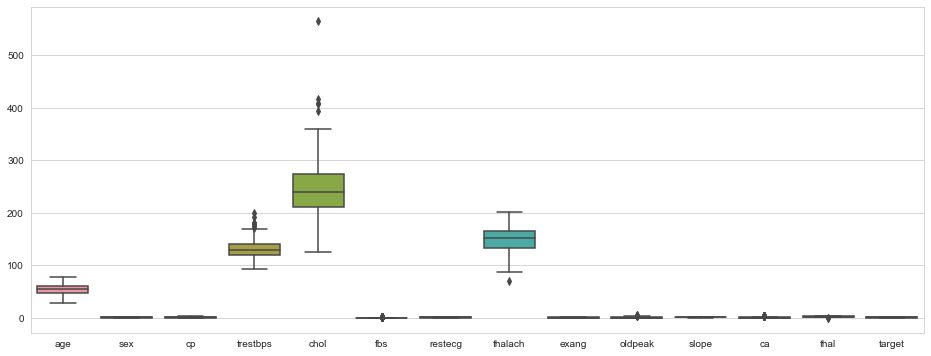

In [96]:
# verifying outliers in a boxplot graph
plt.figure(figsize = (16,6))
sns.boxplot(data = hd)

In [97]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [98]:
# mask to use with for
hd['trestbps'].quantile(0.99)

180.0

In [99]:
# creating a new dataframe to use the mask
hd1 = hd[hd['trestbps'] < hd['trestbps'].quantile(0.99)]

<AxesSubplot:>

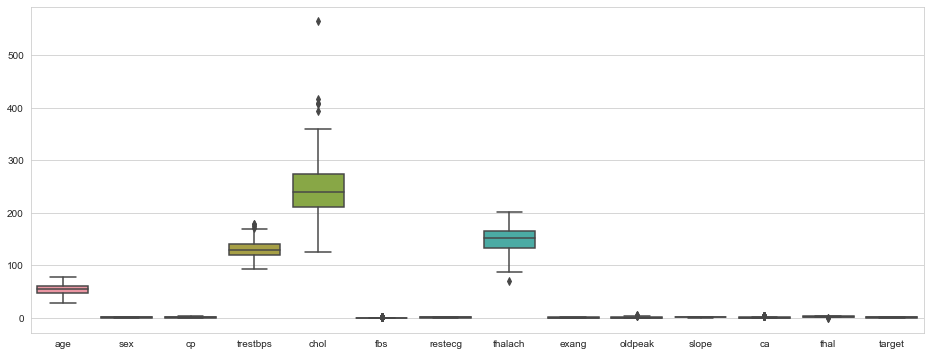

In [100]:
# now we are going to verify if the mask is working well
plt.figure(figsize = (16,6))
sns.boxplot(data = hd1)

In [101]:
# with describe we can make sure that the mask work perfectely
hd1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [102]:
# next step is to use the same mask for 'chol' - outlier is 564.00
hd1['chol'].quantile(0.98)

354.4799999999999

In [103]:
# I want to bring every dada which is lower than 354.4799
hd2 = hd1[hd1['chol'] < hd1['chol'].quantile(0.98)]

<AxesSubplot:>

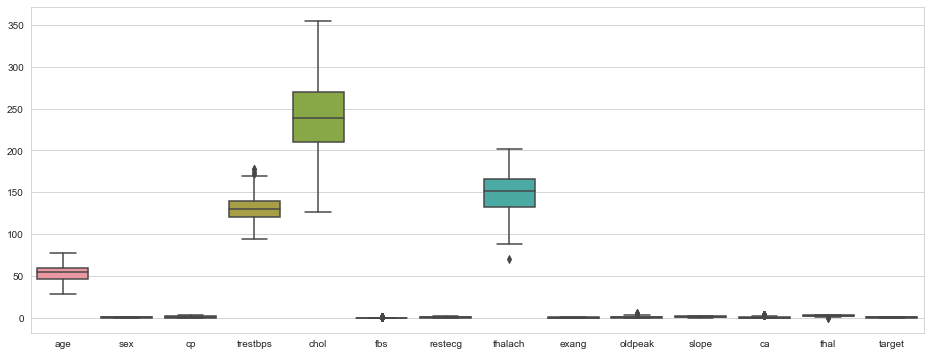

In [104]:
# lets check again if the mask is working well
plt.figure(figsize = (16,6))
sns.boxplot(data = hd2)

In [105]:
hd2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,54.158076,0.701031,0.969072,130.491409,241.907216,0.144330,0.536082,149.457045,0.323024,1.016151,1.402062,0.714777,2.305842,0.546392
std,9.064278,0.458595,1.035111,16.142761,44.214699,0.352029,0.519851,23.061553,0.468437,1.143368,0.615766,1.005719,0.615266,0.498701
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [106]:
# the column 'thalach' has a lower outlier. So we are going to treat it too
# however, as I intend to remove outlier of the begining, the quantile will be 0.005
hd2['thalach'].quantile(0.005)

88.9

In [107]:
# as I want to remove dada from the begining, the mask will remove all data below 88.9
hd3 = hd2[hd2['thalach']>hd2['thalach'].quantile(0.005)]

<AxesSubplot:>

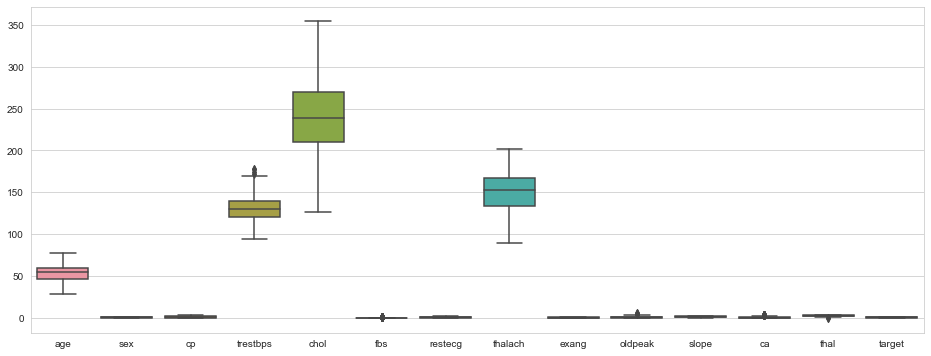

In [108]:
plt.figure(figsize = (16,6))
sns.boxplot (data = hd3)

In [109]:
# the minimal information is 90
hd3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.103806,0.698962,0.975779,130.453287,241.813149,0.145329,0.532872,149.941176,0.321799,1.015571,1.404844,0.716263,2.304498,0.550173
std,9.062454,0.459505,1.035533,16.137174,44.326594,0.353043,0.520209,22.378685,0.467977,1.147279,0.616985,1.008185,0.615777,0.498339
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


---

# Preparing Machine Learning Models

It is time to prepare the date to discover if any individual in this dataset will have hard disease based on the data

In [110]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numeric = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

We can use `drop_first` to have better results, but now we will skip it.
<br>
<br>
Explanation on `drop_first`
<br>
The drop_first parameter in the pd.get_dummies() function serves to remove the first dummy variable column generated for a given categorical variable. This is useful when one-hot encoding a categorical variable with more than two categories, as it avoids perfect linear correlation (colinearity) among the resulting dummy variable columns. By using drop_first=True, the first column is dropped and the remaining columns are kept, avoiding colinearity.

In [111]:
# our base will be the df hd3
# get_dummies will work only with categorical variables
hd4 = pd.get_dummies(hd3, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
hd4.head(2)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1


## Machine Learning Models: to split into train and test

In [112]:
# checking max and min values from hd4
hd4['chol'].max(), hd4['chol'].min()


(354, 126)

In [113]:
hd4.head(2)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1


In [114]:
# with angle X, we are going to work with 30 columns, by removing 'target' column which will be part of y angle.
X = hd4.drop('target', axis = 1)
# inside the 'X' will contain 30 columns

y = hd4['target']
# 'y' will be onli the target column which shows that a person has ou has not heart disease

In [115]:
# train and test split
# In the documentation, we can found the entire code for this.

# As we set 'test_size = 0.20, X_test will be only 20% of all rows
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)


### Machine Learning Models: LogisticRegression()

In [116]:
# Setting max_iter to 1000 in order to avoid error message 'ITERATIONS REACHED LIMIT'
log = LogisticRegression(max_iter=1000)

In [117]:
# Lets train our log
# 'X_train' and 'y_train' were uses to train our df
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [118]:
# checking train accuracy in order to know how precise is this model
log.score(X_train, y_train)

0.8744588744588745

In [119]:
# do the same with test.
log.score(X_test, y_test)

0.8448275862068966

1. Basically, we used `X_train` and `y_train` to train our dataframe
2. To predict our model, we used `X_test` (as below)
3. As the answer for the prediction was **0.8448**, we will check the accuracy of it with `y_test` and `y_previsto`.

In [209]:
# 'X_test' was used to be predicted
y_previsto = log.predict(X_test)

In [121]:
# And now we are going to use 'y_test' to be our answer
accuracy_score(y_test, y_previsto)

0.8448275862068966

In [122]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58



In [211]:
confusion_matrix(y_test, y_previsto)

array([[18,  6],
       [ 3, 31]], dtype=int64)

# Function to run all models

We can save time by creating a function to run our models intead of digiting all this code above

In [138]:
def ml_report (df, algoritmo, opt = 2):
    
    ''' DF '''
    # the base of ML Analysis
    X = df.drop('target', axis = 1)
    y = df['target']
    
    ''' ALGORITMO '''
    # train and test split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42)
    
    ''' OPT '''
    # for all machine learning models that uses 'max_iter' as parameter
    if opt == 0:
        ml = algoritmo(max_iter=1000)
    
    # for all machine learning models that uses 'randomforest'
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    
    # for other cases
    elif opt == 2:
        ml = algoritmo()
    
    # for traning ml
    ml.fit(X_train, y_train)
    
    score_train = ml.score(X_train, y_train)
    print(f'Train accuracy: {score_train * 100:.2f}%')
    
    score_test = ml.score(X_test, y_test)
    print(f'Test accuracy: {score_test * 100:.2f}%')
    
    # Classification Report
    y_previsto = log.predict(X_test)
    print('               ')
    print('--- Reports ---')
    print('               ')
    print('--- CLASSIFICATION REPORT ---')
    print(classification_report(y_test, y_previsto))
    
    # Confusion Matrix Report
    print('--- CONFUSION MATRIX ---')
    confusion = confusion_matrix(y_test, y_previsto)          
    sns.heatmap(confusion, annot = True, cmap = 'Blues')
    
    return score_train, score_test
    

## LogisticRegression

Train accuracy: 87.45%
Test accuracy: 84.48%
               
--- Reports ---
               
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


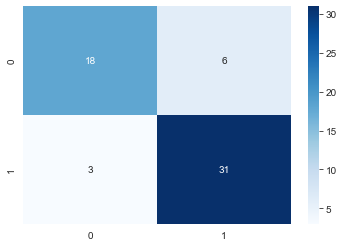

In [140]:
# 1st test
# LogistitcRegression
log_train, log_test = ml_report(hd4, LogisticRegression, opt = 0)

## DecisionTreeClassifier

Train accuracy: 100.00%
Test accuracy: 74.14%
               
--- Reports ---
               
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


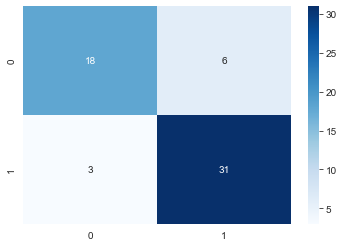

In [141]:
# 2nd test: DecisionTreeClassifier
tree_train, tree_test = ml_report(hd4, DecisionTreeClassifier)

## AdaBoostClassifier

Train accuracy: 93.51%
Test accuracy: 82.76%
               
--- Reports ---
               
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


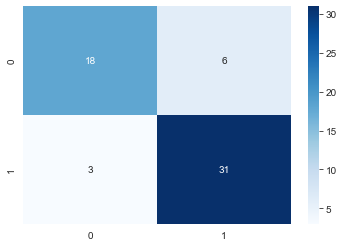

In [142]:
# 3rd test: AdaBoostClassifier
ada_train, ada_test = ml_report(hd4, AdaBoostClassifier)

## KNeighborsClassifier

Train accuracy: 77.06%
Test accuracy: 60.34%
               
--- Reports ---
               
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


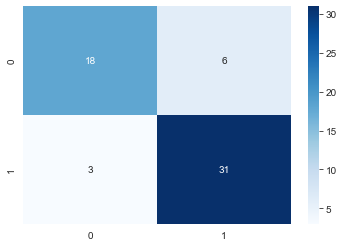

In [150]:
kn_train, kn_test = ml_report(hd4, KNeighborsClassifier)

## RandomForestClassifier

Train accuracy: 100.00%
Test accuracy: 77.59%
               
--- Reports ---
               
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


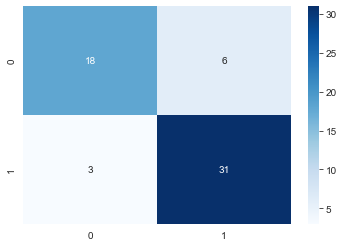

In [147]:
rand_train, rand_test = ml_report(hd4, RandomForestClassifier)

## Table Comparison

In [152]:
# creating a dictionary with all models used
ml_models = {'Models':['Logistic Regression', 'Decision Tree', 'KNeighbors','Random Forest', 'Ada Boost'],
             'Accuracy Train':[round(log_train * 100,2),round(tree_train * 100,2), round(kn_train * 100,2),
                         round(rand_train * 100,2), round(ada_train * 100,2)],
            'Accuracy Test': [round(log_test * 100,2), round(tree_test * 100,2), round(kn_test * 100,2),
                             round(rand_test * 100,2), round(ada_test * 100,2)]}

In [158]:
# creating a data fram to store the ml_models dictionary
ml_df = pd.DataFrame(ml_models)

# sorting the results by the largerst 'Accuracy Test'
ml_df.sort_values(by= 'Accuracy Test', ascending = False, inplace = True)
ml_df

,Models,Accuracy Train,Accuracy Test
0,Logistic Regression,87.45,84.48
4,Ada Boost,93.51,82.76
3,Random Forest,100.00,77.59
1,Decision Tree,100.00,74.14
2,KNeighbors,77.06,60.34


# Standard Scaler

## Modifying the ML_REPORT function to work with StandardScaler

In [213]:
def ml_scaler_report (df, algoritmo, opt = 2):
    
    ''' DF '''
    # the base of ML Analysis
    X = df.drop('target', axis = 1)
    y = df['target']
    
    ''' ALGORITMO '''
    # train and test split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42)
    
    ''' MODIFYING '''
    # Adding StandardScaler
    scaler = StandardScaler()
    cols_scaler = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
    X_test[cols_scaler] = scaler.transform(X_test[cols_scaler])
        
    ''' OPT '''
    # for all machine learning models that uses 'max_iter' as parameter
    if opt == 0:
        ml = algoritmo(max_iter=1000)
    
    # for all machine learning models that uses 'randomforest'
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    
    # for other cases
    elif opt == 2:
        ml = algoritmo()
    
    # for traning ml
    ml.fit(X_train, y_train)
    
    score_train = ml.score(X_train, y_train)
    print(f'Train accuracy: {score_train * 100:.2f}%')
    
    score_test = ml.score(X_test, y_test)
    print(f'Test accuracy: {score_test * 100:.2f}%')
    
    # Classification Report
    y_previsto = log.predict(X_test)
    print('               ')
    print('--- Reports ---')
    print('               ')
    print('--- CLASSIFICATION REPORT ---')
    print(classification_report(y_test, y_previsto))
    
    # Confusion Matrix Report
    print('--- CONFUSION MATRIX ---')
    confusion = confusion_matrix(y_test, y_previsto)          
    sns.heatmap(confusion, annot = True, cmap = 'BuPu')
    
    return score_train, score_test

## LogisticRegression

Train accuracy: 87.45%
Test accuracy: 84.48%
               
--- Reports ---
               
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


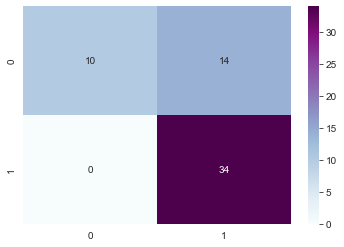

In [196]:
log_train_scaler, log_test_scaler = ml_scaler_report(hd4, LogisticRegression, opt = 0)

## DecisionTreeClassifier

Train accuracy: 100.00%
Test accuracy: 72.41%
               
--- Reports ---
               
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


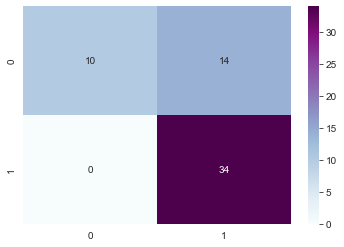

In [197]:
tree_train_scaler, tree_test_scaler = ml_scaler_report(hd4, DecisionTreeClassifier)

## AdaBoostClassifier

Train accuracy: 93.51%
Test accuracy: 82.76%
               
--- Reports ---
               
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


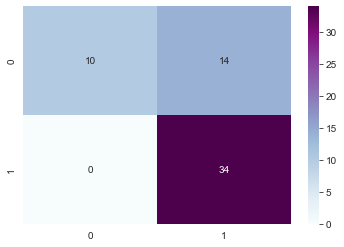

In [198]:
ada_train_scaler, ada_test_scaler = ml_scaler_report(hd4, AdaBoostClassifier)

## KNeighborsClassifier

Train accuracy: 87.45%
Test accuracy: 79.31%
               
--- Reports ---
               
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


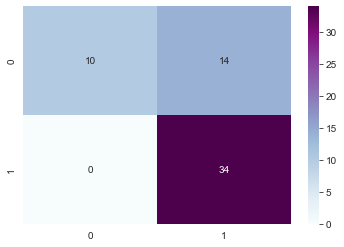

In [199]:
kn_train_scaler, kn_test_scaler = ml_scaler_report(hd4, KNeighborsClassifier)

## RandomForestClassifier

Train accuracy: 100.00%
Test accuracy: 77.59%
               
--- Reports ---
               
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


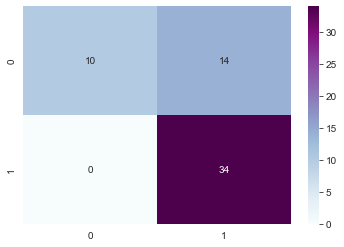

In [200]:
rand_train_scaler, rand_test_scaler = ml_scaler_report(hd4, RandomForestClassifier)

## Standard Scaler Table Comparison

In [201]:
# creating a dictionary with all models used
ml_models_scaler = {'Models':['Logistic Regression', 'Decision Tree', 'KNeighbors','Random Forest', 'Ada Boost'],
             'Accuracy Train':[round(log_train_scaler * 100,2),round(tree_train_scaler * 100,2), round(kn_train_scaler * 100,2),
                         round(rand_train_scaler * 100,2), round(ada_train_scaler * 100,2)],
            'Accuracy Test': [round(log_test_scaler * 100,2), round(tree_test_scaler * 100,2), round(kn_test_scaler * 100,2),
                             round(rand_test_scaler * 100,2), round(ada_test_scaler * 100,2)]}

In [215]:
ml_scaler_df = pd.DataFrame(ml_models_scaler)
ml_scaler_df.sort_values('Accuracy Test', ascending = False, inplace=True)

In [216]:
ml_scaler_df

,Models,Accuracy Train,Accuracy Test
0,Logistic Regression,87.45,84.48
4,Ada Boost,93.51,82.76
2,KNeighbors,87.45,79.31
3,Random Forest,100.00,77.59
1,Decision Tree,100.00,72.41


# Conclusion

As seen below, there is no big diference by using StandardScaler. Only KNeighbors has improved from 60.34 to 77.59 (Models not based on `DecisionTreeClassifiers` are benefited)

In [217]:
ml_scaler_df

,Models,Accuracy Train,Accuracy Test
0,Logistic Regression,87.45,84.48
4,Ada Boost,93.51,82.76
2,KNeighbors,87.45,79.31
3,Random Forest,100.00,77.59
1,Decision Tree,100.00,72.41


In [218]:
ml_df

,Models,Accuracy Train,Accuracy Test
0,Logistic Regression,87.45,84.48
4,Ada Boost,93.51,82.76
3,Random Forest,100.00,77.59
1,Decision Tree,100.00,74.14
2,KNeighbors,77.06,60.34


By using or not `StandardScaler`, `LogisticRegression` brought the best result to predict if a person has or not heart disease.